In [ ]:
%pip install opendatasets
%pip install contractions
%pip install tensorflow-gpu 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 20.7 MB/s 
     |████████████████████████████████| 106 kB 31.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 7.2 kB/s 
     |████████████████████████████████| 1.7 MB 54.5 MB/s 
     |████████████████████████████████| 6.0 MB 48.1 MB/s 
     |████████████████████████████████| 439 kB 66.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully unin

In [ ]:
import opendatasets as od
import re
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import contractions

In [ ]:
od.download('https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp')
# kaggle username and key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: stevanuso
Your Kaggle Key: ··········


100%|██████████| 721k/721k [00:00<00:00, 900kB/s]

# Reading dataset

In [ ]:
train_df = pd.read_csv("../content/emotions-dataset-for-nlp/train.txt", sep=';', header=None, names=['text', 'label'])
test_df = pd.read_csv("../content/emotions-dataset-for-nlp/test.txt", sep=';', header=None, names=['text', 'label'])
val_df = pd.read_csv("../content/emotions-dataset-for-nlp/val.txt", sep=';', header=None, names=['text', 'label'])

In [ ]:
train_df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
print("Train Shape", train_df.shape)
print("Test Shape", test_df.shape)
print("Val Shape", val_df.shape)

Train Shape (16000, 2)
Test Shape (2000, 2)
Val Shape (2000, 2)


# Checking for null values

In [ ]:
print("Train")
train_df.isnull().sum()

Train


text     0
label    0
dtype: int64

In [ ]:
print("Test")
test_df.isnull().sum()

Test


text     0
label    0
dtype: int64

In [ ]:
print("Val")
val_df.isnull().sum()

Val


text     0
label    0
dtype: int64

# Target of Label Distribution

In [ ]:
train_df['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

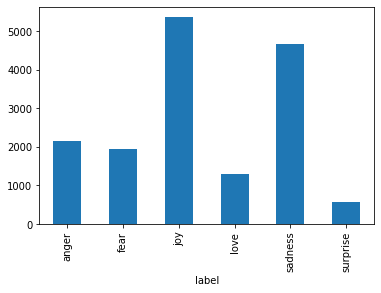

In [ ]:
train_df.groupby('label').size().plot(kind='bar')

In [ ]:
test_df['label'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64

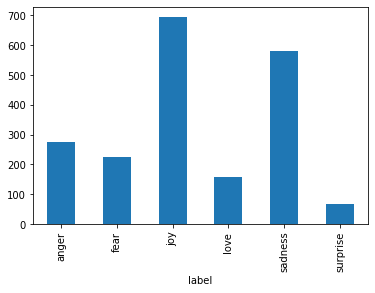

In [ ]:
test_df.groupby('label').size().plot(kind='bar')

In [ ]:
val_df['label'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: label, dtype: int64

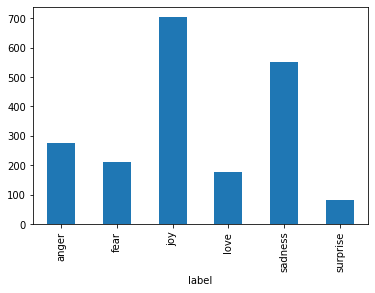

In [ ]:
val_df.groupby('label').size().plot(kind='bar')

# Sample text

In [ ]:
sample_train = train_df['text'][0]
sample_test = test_df['text'][0]
sample_val = val_df['text'][0]

In [ ]:
print("train sample txt:", sample_train)
print("test sample txt:", sample_test)
print("val sample txt:", sample_val)

train sample txt: i didnt feel humiliated
test sample txt: im feeling rather rotten so im not very ambitious right now
val sample txt: im feeling quite sad and sorry for myself but ill snap out of it soon


# Text Processing

- Lowercase
- Removing number
- Removing Punctuation
- Remove Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lower_text(text):
    return text.lower()

def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)

def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')
    return text

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text

def lemmatize_lower(text):
    negative = ['not', 'neither', 'nor', 'but', 'however',
                'although', 'nonetheless', 'despite', 'except',
                        'even though', 'yet','unless']
    stop_words = [word for word in text.split() if word not in (stopwords)]
    text = ' '.join([lemmatizer.lemmatize(contractions.fix(lower_text(text))) for txt in text.split() if txt not in stop_words])
    return text

 

In [ ]:
def clean_text(text):
    text = remove_number(text)
    text = remove_punct(text)
    text = lemmatize_lower(text)
    text = remove_stopwords(text)
  
    return text

In [ ]:
train_df["clean_text"] = train_df["text"].apply(clean_text)
test_df["clean_text"] = test_df["text"].apply(clean_text)
val_df["clean_text"] = val_df["text"].apply(clean_text)

In [ ]:
train_df.head(50)

,text,label,clean_text,encoded_label
0,i didnt feel humiliated,sadness,feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong grabbin...,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,feeling grouchy feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately sure feeling li...,4
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...,5
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man...,1
8,i have been with petronas for years i feel tha...,joy,petronas years feel petronas performed well ma...,2
9,i feel romantic too,love,feel romantic feel romantic,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
train_df["encoded_label"] = encoder.fit_transform(train_df["label"])
val_df["encoded_label"] = encoder.transform(val_df["label"])
test_df["encoded_label"] = encoder.transform(test_df["label"])

In [ ]:
X_train = train_df['clean_text']
X_test = val_df['clean_text']
y_train = train_df['encoded_label']
y_test = val_df['encoded_label']

# Tokenization

In [ ]:
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

In [ ]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(test_df['clean_text'])

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

14977


In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=128)
X_test = pad_sequences(X_test, padding='post', maxlen=128)
X_val = pad_sequences(X_val, padding='post', maxlen=128)

In [ ]:
dmy_y_test = to_categorical(y_test)
dmy_y_train = to_categorical(y_train)

# Model

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau

In [ ]:
model = Sequential([
    Embedding(vocab_size, 64, input_length=128),
    Dropout(0.4),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(256)),
    Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 64)           958528    
                                                                 
 dropout_1 (Dropout)         (None, 128, 64)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128, 256)         197632    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 2,209,862
Trainable params: 2,209,862
No

In [ ]:
class callbackTarget(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.91 and logs.get('accuracy') >= 0.91):
      print('\nVal_accuracy and accuracy has reached >= 91%!')
      self.model.stop_training = True

callbacks = callbackTarget()

LR_reduction = ReduceLROnPlateau(
    monitor = 'val_loss',
    patience = 2, 
    verbose = 1,
    factor = 0.2,
    min_lr = 0.0000003
)

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
print(device_name)

/device:GPU:0


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, dmy_y_train,
                    epochs=200, 
                    verbose=1,
                    validation_data=(X_test, dmy_y_test),
                    batch_size=128)

Epoch 1/200
125/125 [==============================] - 23s 129ms/step - loss: 1.2399 - accuracy: 0.5258 - val_loss: 0.7748 - val_accuracy: 0.7200
Epoch 2/200
125/125 [==============================] - 11s 89ms/step - loss: 0.4552 - accuracy: 0.8403 - val_loss: 0.4745 - val_accuracy: 0.8425
Epoch 3/200
125/125 [==============================] - 9s 74ms/step - loss: 0.2164 - accuracy: 0.9296 - val_loss: 0.4690 - val_accuracy: 0.8525
Epoch 4/200
125/125 [==============================] - 9s 71ms/step - loss: 0.1556 - accuracy: 0.9483 - val_loss: 0.5433 - val_accuracy: 0.8350
Epoch 5/200
125/125 [==============================] - 9s 68ms/step - loss: 0.1299 - accuracy: 0.9589 - val_loss: 0.4763 - val_accuracy: 0.8660
Epoch 6/200
125/125 [==============================] - 9s 70ms/step - loss: 0.1031 - accuracy: 0.9671 - val_loss: 0.5392 - val_accuracy: 0.8530
Epoch 7/200
125/125 [==============================] - 9s 71ms/step - loss: 0.0931 - accuracy: 0.9701 - val_loss: 0.4914 - val_accura

# Save Model

In [ ]:
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Evaluation

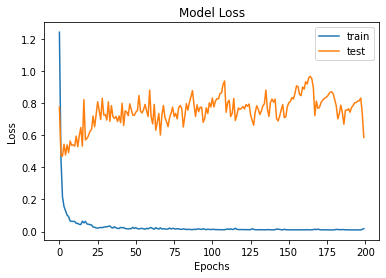

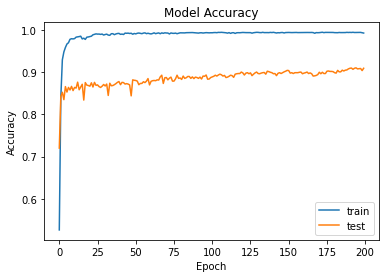

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
predict = model.predict(X_val)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

63/63 [==============================] - 3s 15ms/step


array([4, 4, 4, ..., 2, 2, 5])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_df["encoded_label"], predict_class, target_names =["anger", "fear", "joy", "love", "sadness", "surprise"]))

              precision    recall  f1-score   support

       anger       0.91      0.88      0.89       275
        fear       0.89      0.86      0.88       224
         joy       0.92      0.92      0.92       695
        love       0.71      0.81      0.76       159
     sadness       0.93      0.94      0.94       581
    surprise       0.82      0.71      0.76        66

    accuracy                           0.90      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.90      0.90      0.90      2000

